In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox  
import matplotlib.image as mpimg
import numpy as np
from numpy import genfromtxt
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the data
df = pd.read_csv("countries.csv",delimiter=";")  
print(df.head())
# print(df.columns)
# print(df.country)

    country    cases  deaths  population flag
0   Austria  1376485   13436     9000000   au
1   Belgium  2347164   28566    11589000   be
2  Bulgaria   799943   31838     6948000   bu
3   Croatia   785033   12983     4105257   hr
4    Cyprus   215271     669     1207000   cy


In [3]:
# Assigning each column to a variable
country=df.country
cases=df.cases
population=df.population
deaths=df.deaths
flag=df.flag

<b>1) Plot the number of cases of each country using a bar plot.</b>

C:\Users\User\AppData\Local\Temp\ipykernel_18040\2874373781.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases


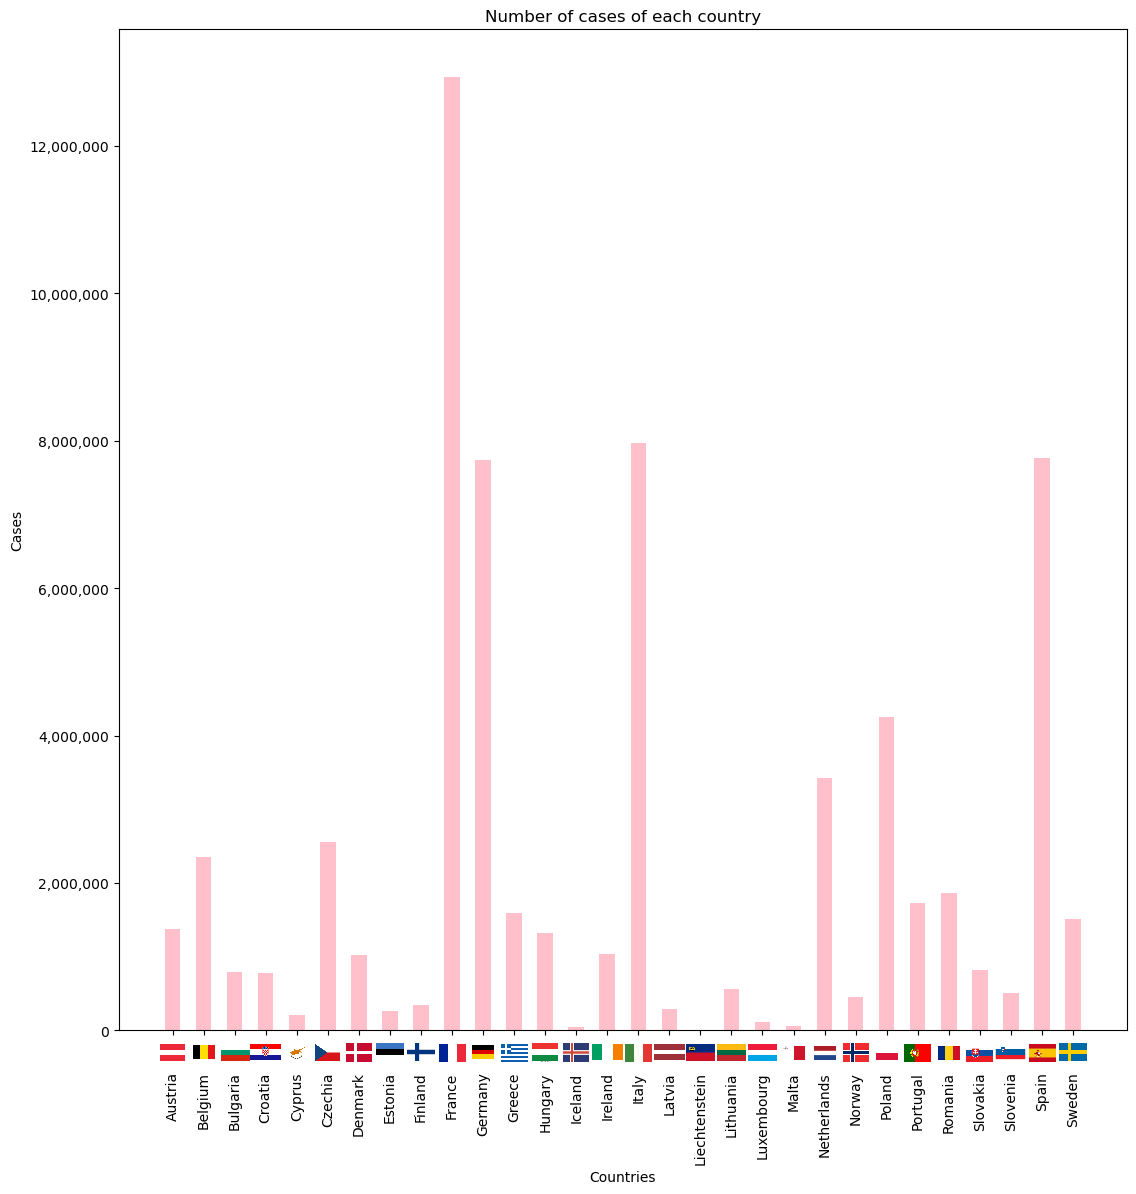

In [4]:
fig, ax = plt.subplots(figsize=(13,13)) # specify subplots and size of barplot being 15x15

def get_flag(name):
    path = r"C:\path\to\flags\{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.07)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)  
countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia","Denmark","Estonia",
             "Finland","France", "Germany","Greece", "Hungary","Iceland", "Ireland","Italy",
             "Latvia","Liechtenstein","Lithuania","Luxembourg", "Malta","Netherlands", "Norway","Poland",
             "Portugal","Romania","Slovakia","Slovenia", "Spain", "Sweden"]    


ax.bar(range(len(countries)), cases, width=0.5,align="center", color='pink')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=26)
plt.title('Number of cases of each country')  # plot the title of the barplot
plt.xlabel("Countries")  # plot the label of x-axis
plt.ylabel("Cases")  # plot the label of y-axis
plt.xticks(rotation='vertical')  # plot the country names verticaly
current_values = plt.gca().get_yticks()  # get the current values of y-axis
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases


for i, c in enumerate(countries):
    offset_image(i, c, ax)


# plt.grid()
# plt.draw()
# plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')

plt.show()

France, Germany, Italy and Spain are the countries with the most covid19 cases with France having more than 12 million cases and the 3 others having around 8 million. Also, the countries with the fewest cases include Cyprus, Estonia, Finland, Iceland, Latvia, Liechtenstein, Luxembourg, and Malta. However, the number of cases for one country is proportionate to its population, meaning that if one country has a small number of cases and a small population, its cases may be considered large when compared to its population. As a result, cases should be studied in conjunction with the general population. Furthermore, a high case value may not imply a high death value, thus both cases and deaths should be reviewed.

C:\Users\User\AppData\Local\Temp\ipykernel_18040\2916097331.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases


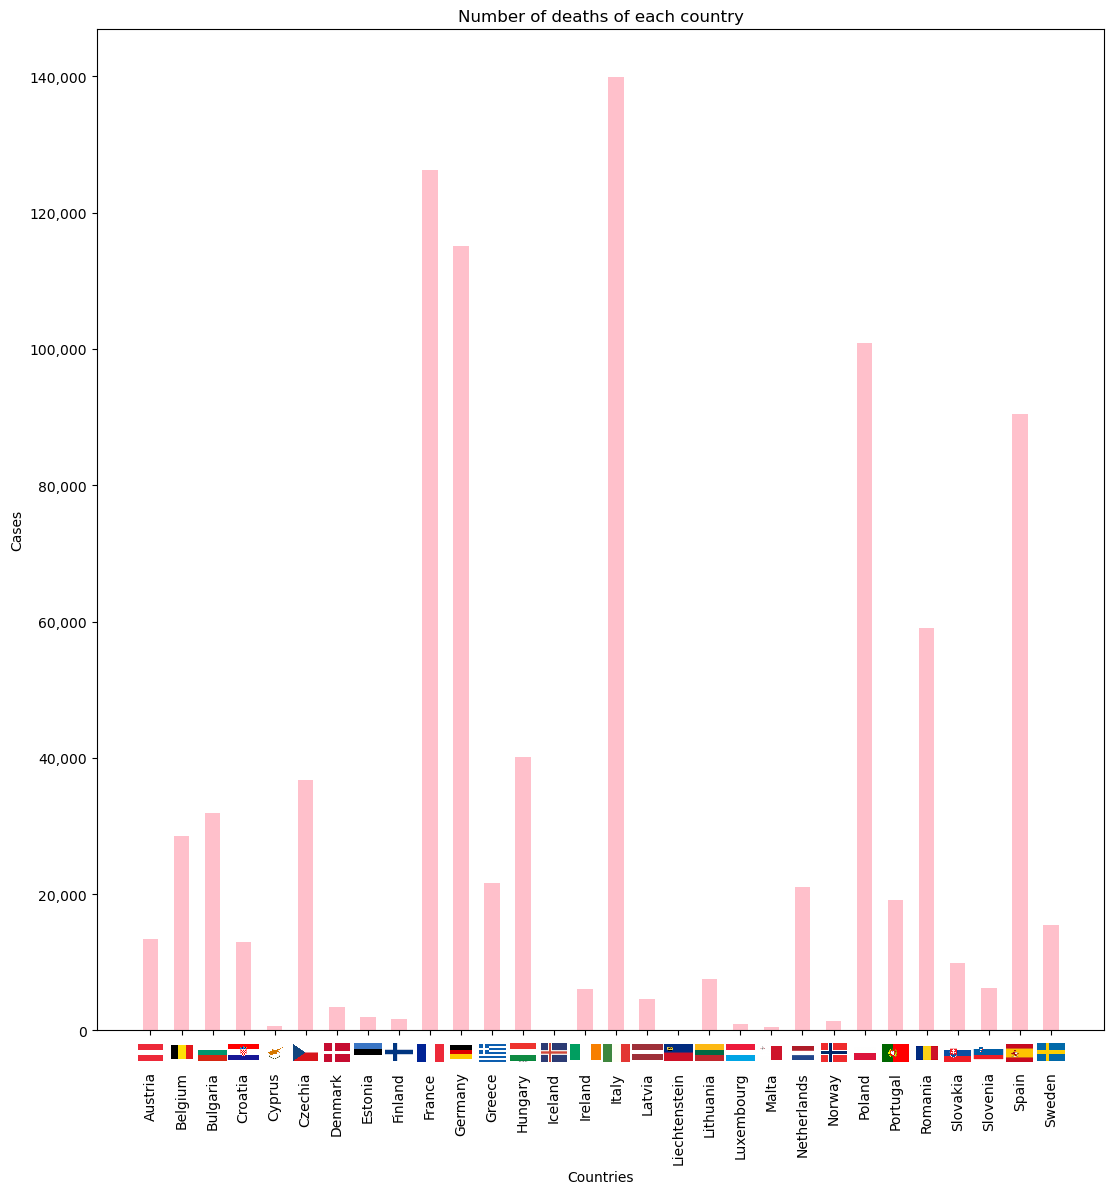

In [5]:
fig, ax = plt.subplots(figsize=(13,13)) # specify subplots and size of barplot being 15x15

def get_flag(name):
    path = r"C:\path\to\flags\{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.07)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)  
countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia","Denmark","Estonia",
             "Finland","France", "Germany","Greece", "Hungary","Iceland", "Ireland","Italy",
             "Latvia","Liechtenstein","Lithuania","Luxembourg", "Malta","Netherlands", "Norway","Poland",
             "Portugal","Romania","Slovakia","Slovenia", "Spain", "Sweden"]    


ax.bar(range(len(countries)), deaths, width=0.5,align="center", color='pink')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=26)
plt.title('Number of deaths of each country')  # plot the title of the barplot
plt.xlabel("Countries")  # plot the label of x-axis
plt.ylabel("Cases")  # plot the label of y-axis
plt.xticks(rotation='vertical')  # plot the country names verticaly
current_values = plt.gca().get_yticks()  # get the current values of y-axis
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases


for i, c in enumerate(countries):
    offset_image(i, c, ax)


# plt.grid()
# plt.draw()
# plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')

plt.show()

Italy, France, Germany,Poland and Spain are the countries with the most deaths.
Cyprus, Denmark, Estonia, Finland, Iceland, Ireland, Latvia, Liechtenstein, Lithuania, Luxembourg,  Malta, Norway, Slovakia and Slovenia are the countries with the fewer deaths.

<b>2) Plot the percentages of cases/population and deaths/cases of each country in terms of a stacked bar plot.</b>

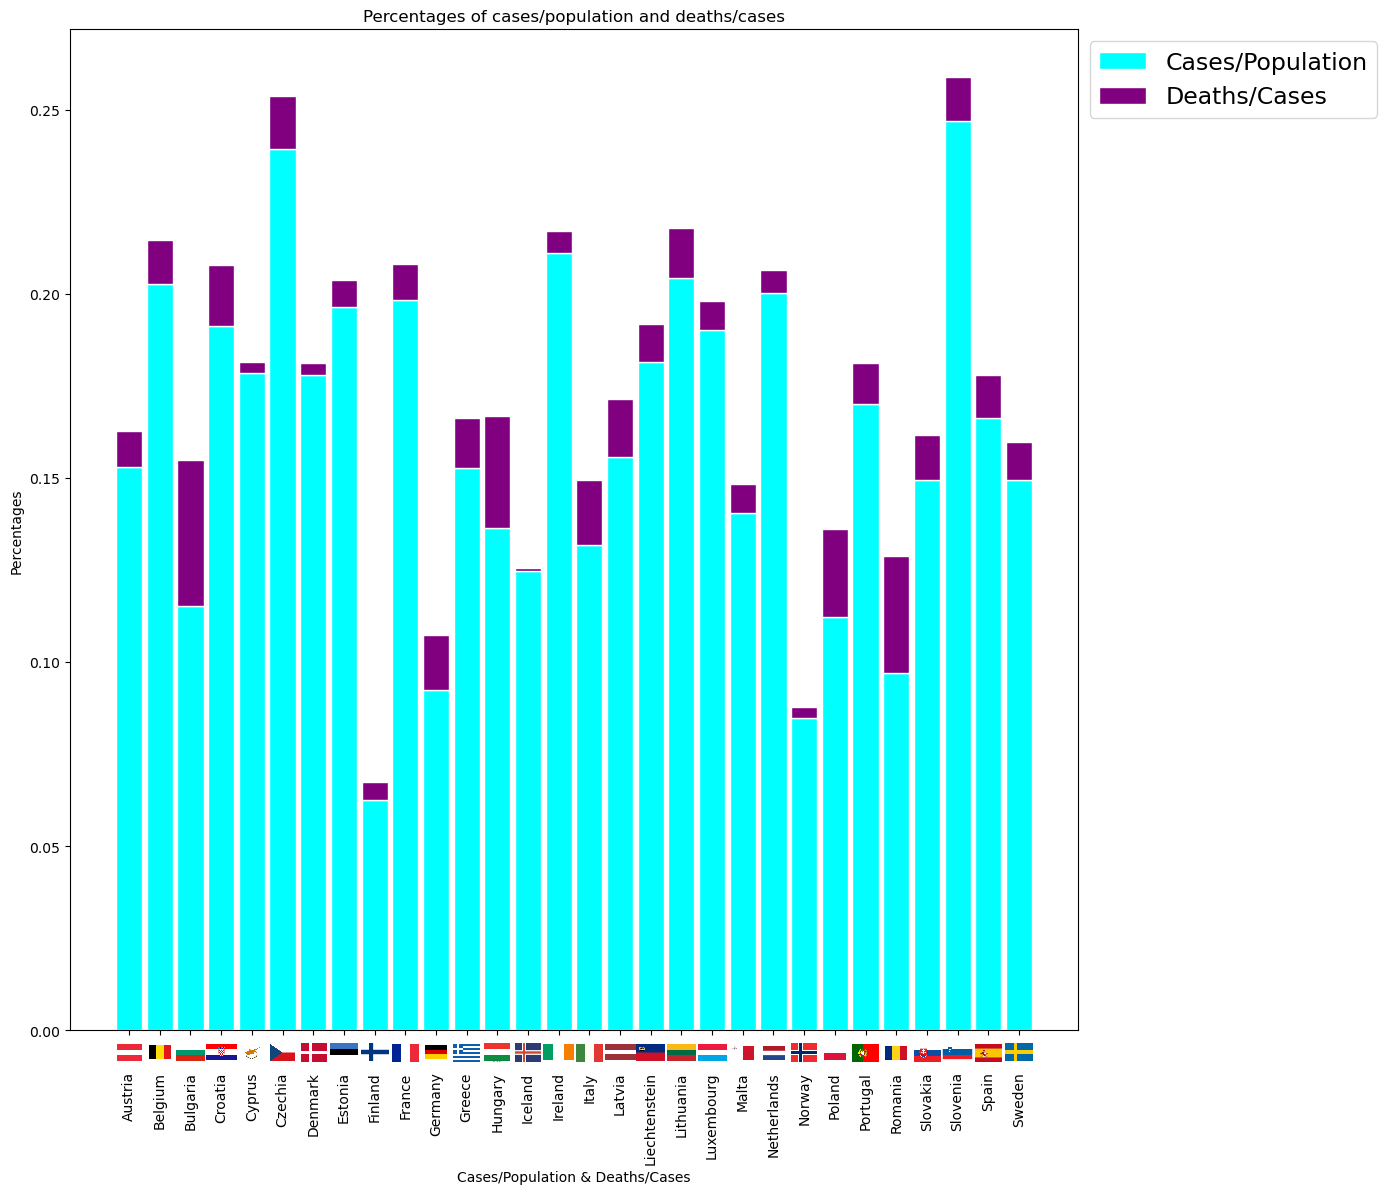

In [6]:
#Define the number of countries
r=range(0,len(country))

# From raw value to percentage
cas_pop = [i / j  for i,j in zip(cases, population)]  # cases/population percentage
de_cas = [i / j  for i,j in zip(deaths, cases)]  # deaths/cases percentage
 
# plot
fig, ax = plt.subplots(figsize=(13,13)) # specify subplots and size of barplot being 13x13

# Create population percentage Bars
ax.bar(r, cas_pop, color='cyan', edgecolor='white', width=0.85, label='Cases/Population')
# Create cases percentage Bars
ax.bar(r, de_cas, bottom=cas_pop, color='purple', edgecolor='white', width=0.85,label='Deaths/Cases')
 
# Custom axis
plt.xticks(r, country)  # define the x-axis being each country 
plt.xlabel("Cases/Population & Deaths/Cases")  # label of x-axis
plt.ylabel("Percentages")  # label of y-axis

# Title
plt.title("Percentages of cases/population and deaths/cases")

# Plot vertically the name of countries
plt.xticks(rotation='vertical')  # plot the country names verticaly    
    
# Legend
plt.legend(ncol=1,bbox_to_anchor=(1,1), fontsize=17)    #loc='upper left'

def get_flag(name):
    path = r"C:\path\to\flags\{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.07)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)  
countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia","Denmark","Estonia",
             "Finland","France", "Germany","Greece", "Hungary","Iceland", "Ireland","Italy",
             "Latvia","Liechtenstein","Lithuania","Luxembourg", "Malta","Netherlands", "Norway","Poland",
             "Portugal","Romania","Slovakia","Slovenia", "Spain", "Sweden"]    


ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=26)

for i, c in enumerate(countries):
    offset_image(i, c, ax)


# plt.grid()
# plt.draw()
# plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')

plt.show()

The Deaths/Cases percentage is not that significant compared to the Cases/Population percentage.

In [7]:
totals = [i+j for i,j in zip(population, cases)]  # population + cases for each country
pop_perc = [i / j * 100 for i,j in zip(population, totals)]  # population percentage
cas_perc = [i / j * 100 for i,j in zip(cases, totals)]  # cases percentage
deaths_per = [i / j * 100 for i,j in zip(deaths, totals)]

df1=pd.DataFrame(cas_perc)
df1.index = country
df1.columns =['cases percentages']
df1

,cases percentages
country,
Austria,13.265427
Belgium,16.842253
Bulgaria,10.324586
Croatia,16.052893
Cyprus,15.135723
Czechia,19.308136
Denmark,15.106151
Estonia,16.408779
Finland,5.898034


We can observe that the percentage of cases in each of the 30 countries is less than 20% of their corresponding population. If we consider that a percentage of 10% or above is a substantial number for cases, we can see that Finland, Norway, Germany and Romania have the lowest percentage of cases in relation to their population. As a result, certain population numbers from the previous barplot, that were consider big, now are considered small, f.e. the percentages for Germany and Italy (being close to 10%). On the other hand, certain countries that were previously thought to have a small number on cases, now appear to have a great one f.e. Cyprus, Estonia, Latvia, Luxembourg and Malta. 

In [8]:
df2=pd.DataFrame(deaths_per)
df2.index = country
df2.columns =['deaths percentages']
df2

,deaths percentages
country,
Austria,0.129485
Belgium,0.204977
Bulgaria,0.410922
Croatia,0.265485
Cyprus,0.047037
Czechia,0.277049
Denmark,0.050318
Estonia,0.123950
Finland,0.028668


<b>3) Display the heatmap of the correlation matrix of deaths and cases.</b>


The pearson correlation is :            deaths     cases
deaths  1.000000  0.912734
cases   0.912734  1.000000


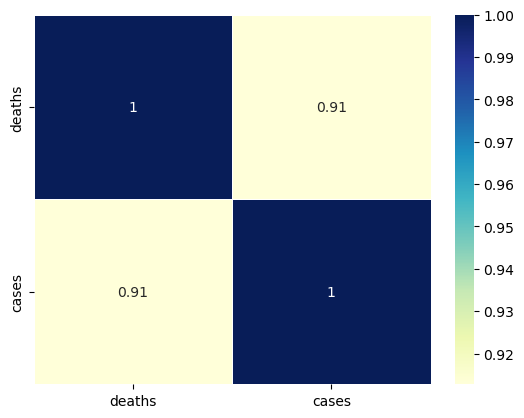

In [9]:
# Pearson correlation 
columns = ['deaths','cases']
corr = df[columns].corr()
print('\nThe pearson correlation is : ', corr)
  
#Draw a heatmap using the results of the correlation test. Use Seaborn.
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

According to the pearson correlation, deaths and cases are highly positive linearly associated, meaning that when deaths rise, so do cases, and vice versa. Moreover, the resulted value is 0.91 which is almost 1, meaning that a linear equation describes almost perfectly the relationship between the two variables.

<b>4) Perform simple linear regression between cases (predictor variable - x) and deaths (response variable). Plot the scatter plot and the corresponding line.</b>

C:\Users\User\AppData\Local\Temp\ipykernel_18040\2964230197.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases


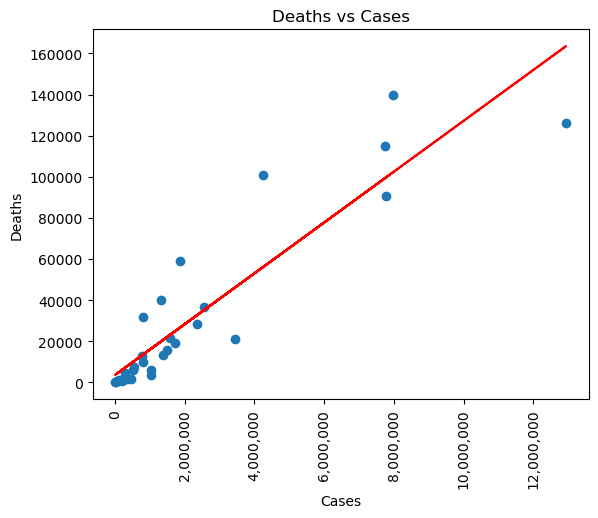

In [10]:
#Simple Linear Regression. 

reshape_cases=cases.values.reshape(-1,1) # 2D array, instead of 1D array 
model0 = LinearRegression().fit(reshape_cases,df.deaths)
ypred = model0.predict(reshape_cases)

plt.scatter(cases,deaths) 
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.title('Deaths vs Cases')
plt.plot(cases,ypred,c='red') #regression line

current_values = plt.gca().get_xticks()  # get the current values of x-axis
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) # display the proper values of cases
# Plot vertically the values of x-axis
plt.xticks(rotation='vertical') 
plt.show()

Above a strong positive linear relationship is displayed between deaths and cases, which is the result that we expected from pearson's correlation. Their relationship is stronger for values of cases being less than 4,000,000 and for values of deaths being less than 60,000.

Conclusion:  
Cases and deaths were found heterogeneous across Europe. This could be attributed to many factors, including demography, climatic, cultural, or socio-economic differences among the countries.
Cases and deaths compared to a country’s corresponding population, seamed to be not a significant number.
Cases and deaths showed to have a strong positive linear association.